In [1]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

plt.rcParams.update({'figure.max_open_warning': 200})
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
from numpy import array
from matplotlib import cm
from sklearn import preprocessing

In [9]:
from google.colab import files
import io
uploaded = files.upload()

Saving breast_cancer_data.csv to breast_cancer_data.csv


In [10]:
pd.set_option( "display.max_columns", None)

df  = pd.read_csv("breast_cancer_data.csv") 

# How big is the training dataset?
 a look at the data set

In [15]:
print("The Breast_cancer_data.csv dataset has {} entires or columns.".format(df.shape))

The Breast_cancer_data.csv dataset has (569, 31) entires or columns.


In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## lets find the count of null values

In [17]:
df.isnull().sum().sort_values(ascending=False)

fractal_dimension_worst    0
area_se                    0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
smoothness_se              0
symmetry_worst             0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
diagnosis                  0
dtype: int64

# Exploratory Data Analysis

In [ ]:
now let see the factors that will increase a patient chances of having a breast cancer or not

# the whole EDA will be base on this one question

## >>>>>>   what are the major factors that increases a person chances of having a breast cancer?

## q1
## How is the distribution of target labels? - Did most people have breast cancer?

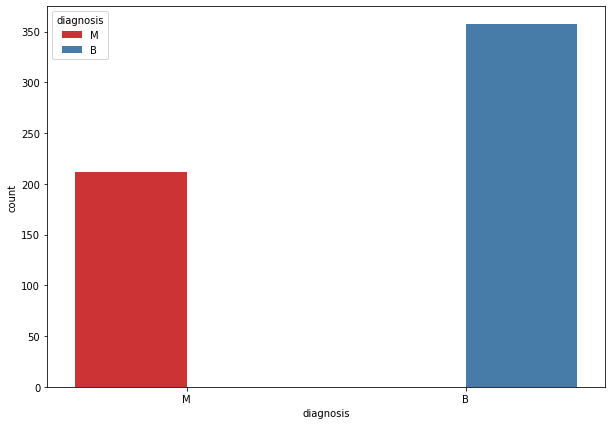

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='diagnosis',data=df, hue='diagnosis',palette="Set1")

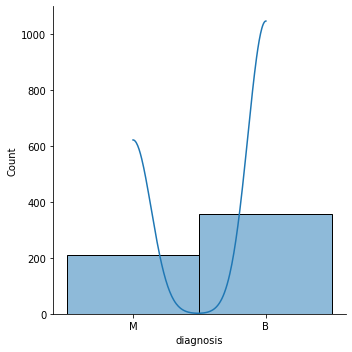

In [21]:
sns.displot(df['diagnosis'],kde=True)

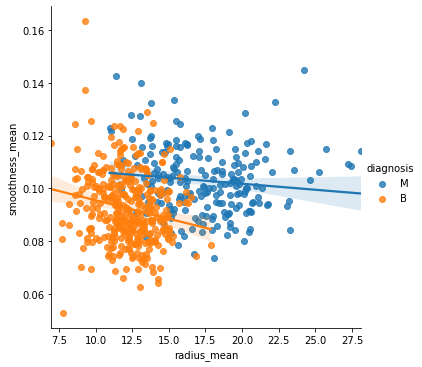

In [26]:
#relationship between two variables
sns.lmplot(x="radius_mean",y="smoothness_mean",hue="diagnosis",data=df);

# does radius_mean increases the chances of having breast cancer

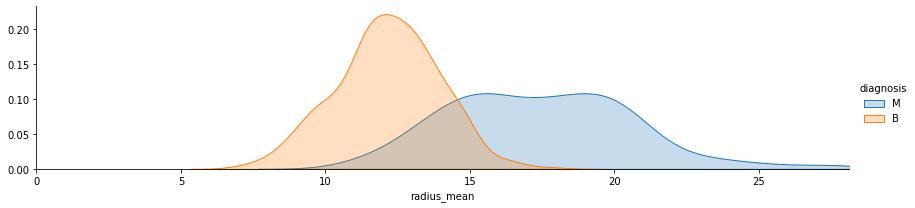

In [30]:
fig = sns.FacetGrid(df, hue='diagnosis',aspect=4)

fig.map(sns.kdeplot,'radius_mean',shade= True)

cancer = df['radius_mean'].max()

fig.set(xlim=(0,cancer))

fig.add_legend()

In [ ]:
does texture_mean increases the chances of having breast cancer




### does texture_mean increases the chances of having breast cancer


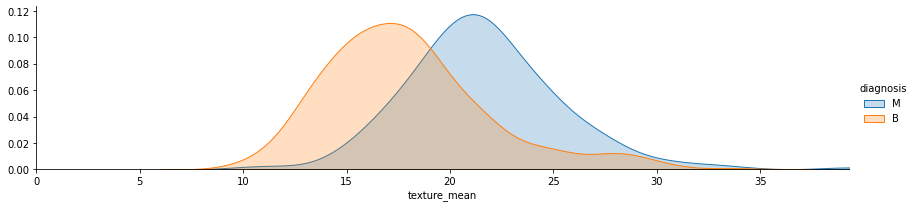

In [33]:
fig = sns.FacetGrid(df, hue='diagnosis',aspect=4)

fig.map(sns.kdeplot,'texture_mean',shade= True)

cancer = df['texture_mean'].max()

fig.set(xlim=(0,cancer))

fig.add_legend()

## enough: lets just use a decisiontree to see the major factors that can increase a person chances of having a breast cancer

## Diagnosis (M = malignant, B = benign) here we going to label encoding (M=1 & B=0)

In [34]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [35]:
feature_cols= ['radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave points_mean',
               'symmetry_mean',	'fractal_dimension_mean',	'radius_se',	'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	
               'concave points_se',	'symmetry_se',	'fractal_dimension_se',	'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',
               'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']

In [55]:

X=df[['radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave points_mean',
               'symmetry_mean',	'fractal_dimension_mean',	'radius_se',	'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	
               'concave points_se',	'symmetry_se',	'fractal_dimension_se',	'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',
               'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst' ]]
y=df.diagnosis

In [56]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(X, y,test_size=0.2, random_state=41)


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [58]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 36)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=36, splitter='best')

In [59]:

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [60]:
Y_pred = tree_clf.predict(xtest)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [61]:
predictions = tree_clf.predict(X)


In [62]:
print("Testing Accuracy :", tree_clf.score(X, y,))
print("Training Accuracy :", tree_clf.score(xtrain,ytrain))

Testing Accuracy : 0.9420035149384886
Training Accuracy : 0.9010989010989011


In [63]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=10, min_samples_leaf= 15)
tree_clf.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

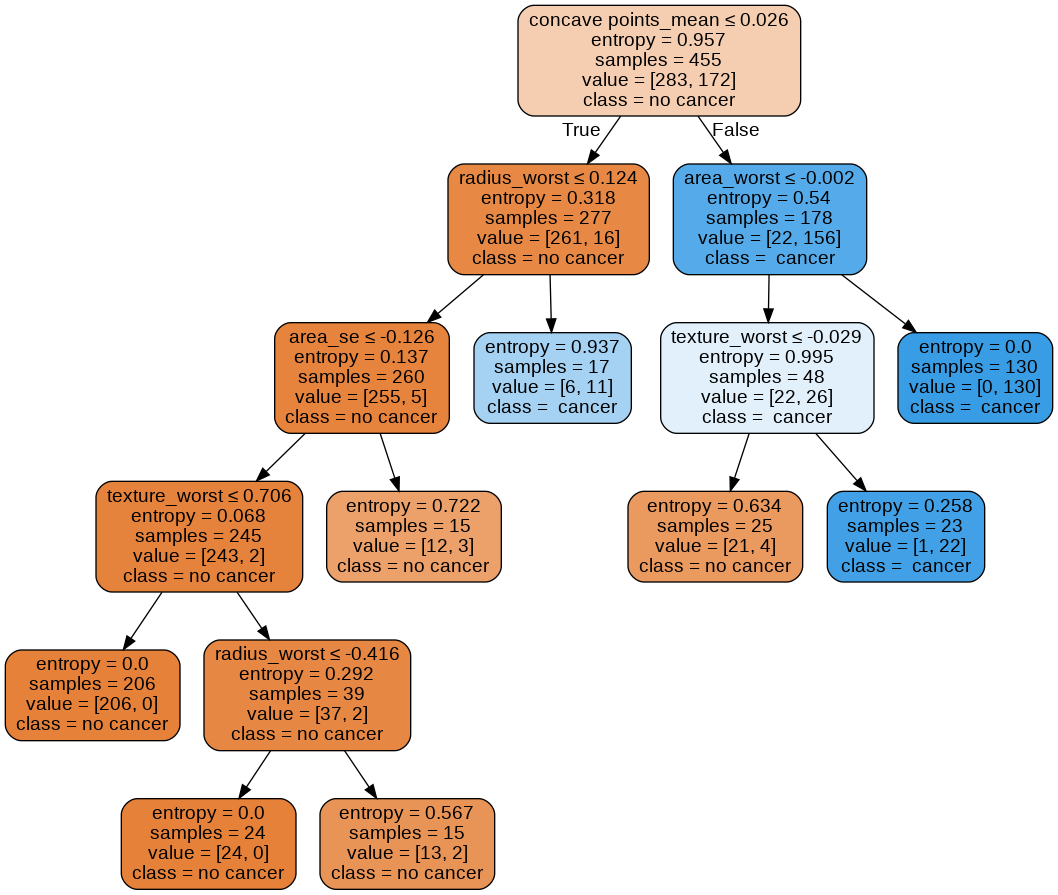

In [65]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['no cancer', ' cancer',])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('betes.png')
Image(graph.create_png())

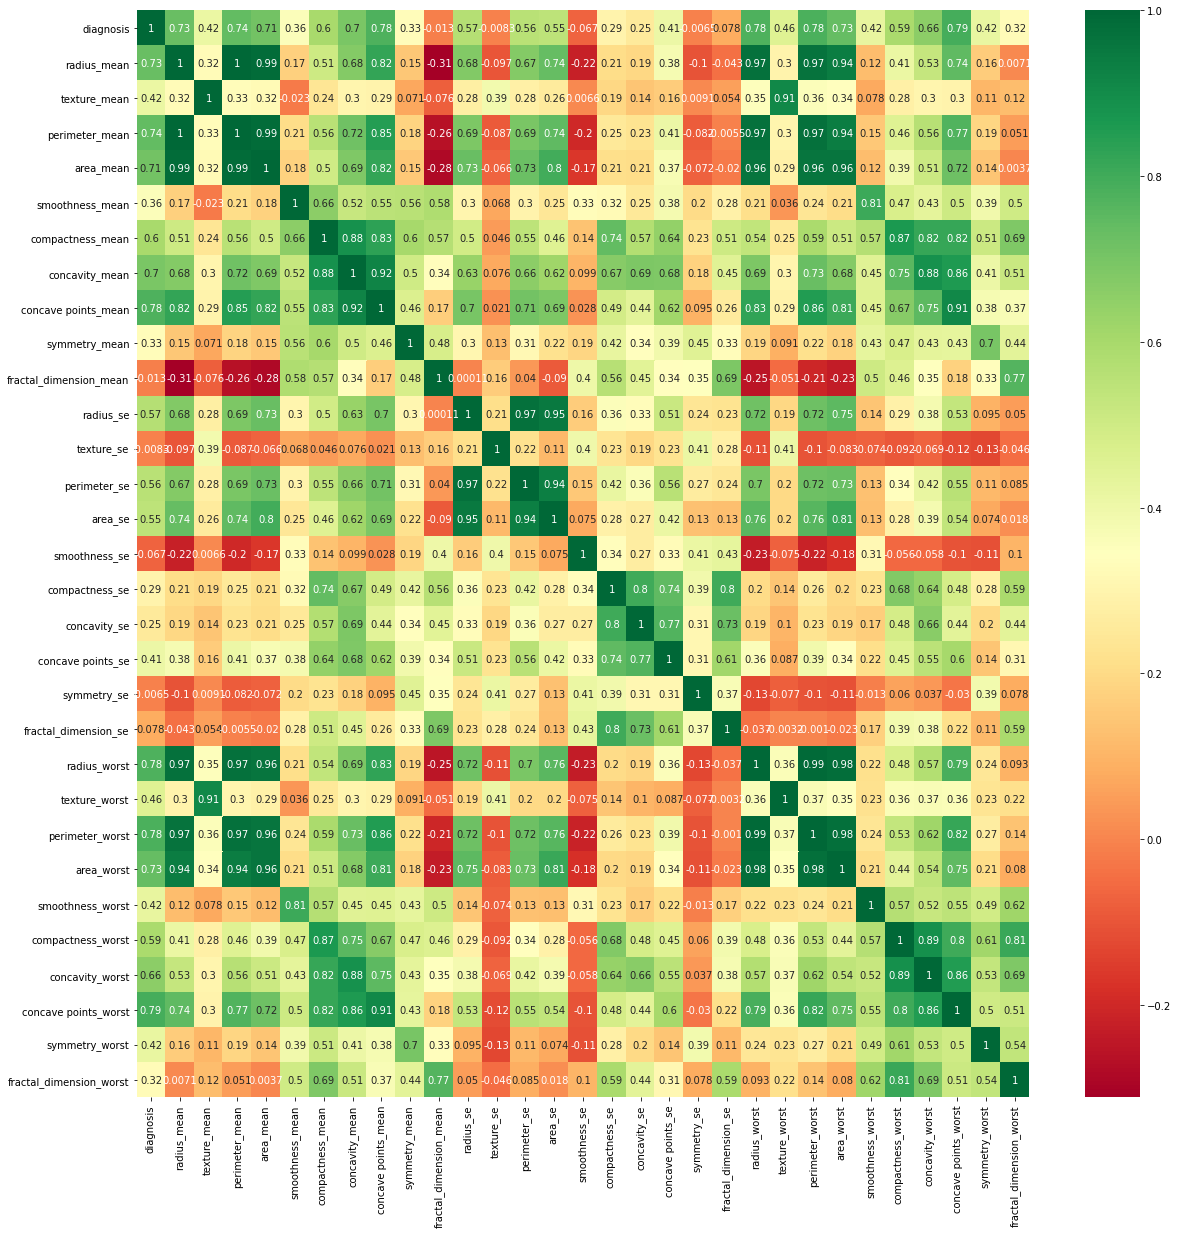

In [66]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index                                    
plt.figure(figsize=(20,20))                                  
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [68]:
import tensorflow as tf
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
X = dataset[feature_cols] # Features
y = dataset.TestScore # Target variable

In [75]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
model.fit(X, y, epochs=10, batch_size=10)

Epoch 1/10
57/57 [==============================] - 10s 1ms/step - loss: 8.2208 - accuracy: 0.3653
Epoch 2/10
57/57 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.8120
Epoch 3/10
57/57 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8588
Epoch 4/10
57/57 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.8958
Epoch 5/10
57/57 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9099
Epoch 6/10
57/57 [==============================] - 0s 1ms/step - loss: 0.2259 - accuracy: 0.9126
Epoch 7/10
57/57 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.9044
Epoch 8/10
57/57 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9011
Epoch 9/10
57/57 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.9008
Epoch 10/10
57/57 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9061


In [78]:
accuracy = model.evaluate(X, y)

18/18 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9192


In [82]:
from graphviz import Source
from ann_visualizer.visualize import ann_viz

In [83]:
ann_viz(model, title="breast cancer visualization with neural network")

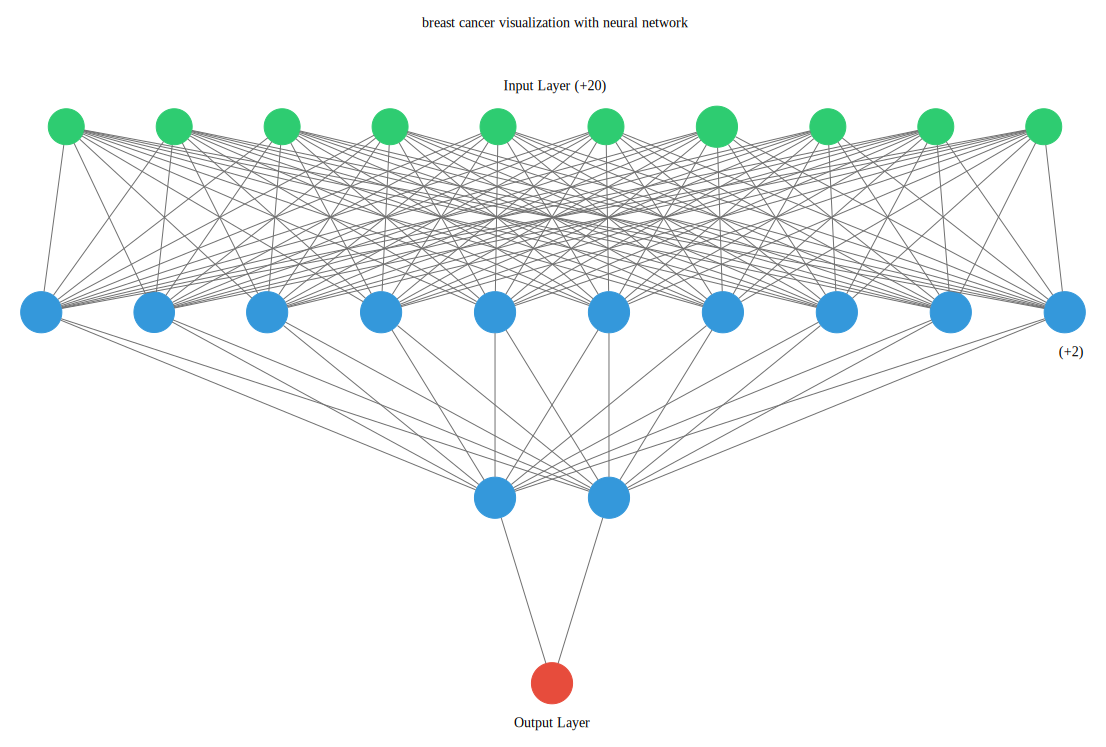

In [84]:
graph_source= Source.from_file("network.gv")
graph_source